In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [5]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

<AxesSubplot:>

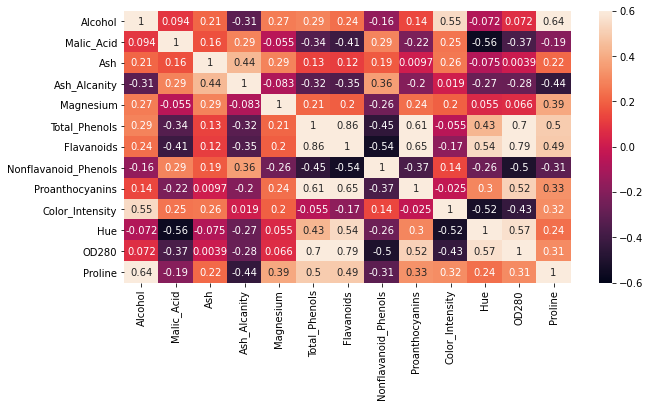

In [28]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, vmin = -0.6, vmax =0.6)

In [ ]:
#Standard Scaling

In [6]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df=sc.fit_transform(data)

In [ ]:
#K-Means Clustering

In [7]:
from sklearn.cluster import KMeans

#print within cluster sum of squares
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

2313.9999999999986
1659.0079672511504
1277.928488844643
1175.7051928197127
1104.861683962532
1042.3872037251417
988.0533283180057
940.708165089653


In [24]:
X = data.drop(['Hue','Nonflavanoid_Phenols','Alcohol','Flavanoids','Proanthocyanins','Total_Phenols'],axis = 1).values
X

array([[   1.71,    2.43,   15.6 , ...,    5.64,    3.92, 1065.  ],
       [   1.78,    2.14,   11.2 , ...,    4.38,    3.4 , 1050.  ],
       [   2.36,    2.67,   18.6 , ...,    5.68,    3.17, 1185.  ],
       ...,
       [   4.28,    2.26,   20.  , ...,   10.2 ,    1.56,  835.  ],
       [   2.59,    2.37,   20.  , ...,    9.3 ,    1.62,  840.  ],
       [   4.1 ,    2.74,   24.5 , ...,    9.2 ,    1.6 ,  560.  ]])

In [30]:
s1 = np.array([5.8, 2.13, 21.5, 86.0, 2.6, 3.1, 380.0]).reshape(1,-1)
s2 = np.array([1.35, 2.27, 16.0, 98.0, 7.22, 3.55, 1045.0]).reshape(1,-1)
s3 = np.array([1.29, 2.1, 20.0, 103.0, 7.6, 1.55, 640.0]).reshape(1,-1)

In [25]:

model = KMeans(n_clusters = 3, init = 'k-means++',random_state = 18)
model.fit(X)
model.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

In [ ]:
# elbow method

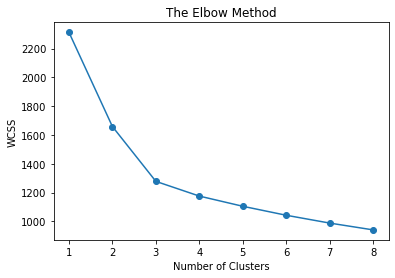

In [8]:
plt.plot(range(1,9),wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
#k-means with number  of clusters=3
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(df)
type(df)
y_kmeans

#convert it into dataframe
y_kmeans=pd.DataFrame(y_kmeans)
y_kmeans = y_kmeans.rename(columns={0:'label'})

In [10]:
#create a new data frame with y_kmeans
df1 = pd.concat([data,y_kmeans], axis=1)

In [11]:
df1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
# Hierarchical Clustering

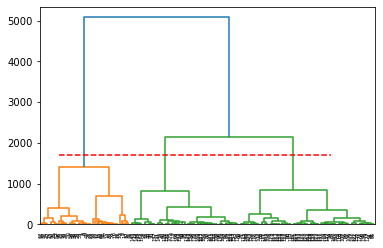

In [26]:
import  scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(X, method = 'ward'),show_leaf_counts = False)
plt.hlines(1700,100,1550,colors='r', linestyle='dashed')
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering
hie_model = AgglomerativeClustering(n_clusters = 3, affinity='euclidean', linkage = 'ward')
hie_model.fit(X)
hie_model.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

In [31]:
model.predict(s1)[0]

1

In [32]:
model.predict(s2)[0]

0

In [33]:
model.predict(s3)[0]

2

In [ ]:
#Visualization with respect to Clusters

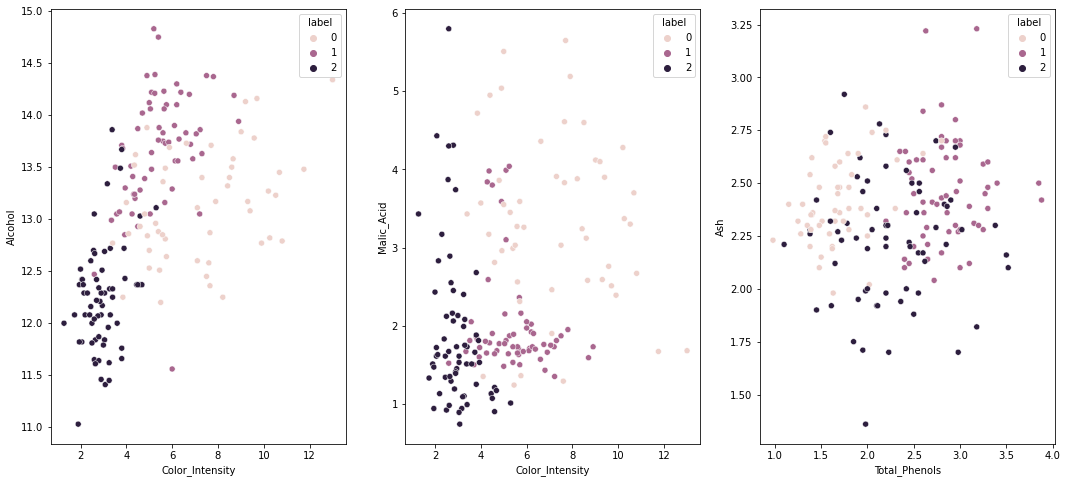

In [22]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,8))
sns.scatterplot(data=df1, x='Color_Intensity', y='Alcohol', hue='label', ax=ax[0])
sns.scatterplot(data=df1, x='Color_Intensity', y='Malic_Acid', hue='label', ax=ax[1])
sns.scatterplot(data=df1, x='Total_Phenols', y='Ash', hue='label', ax=ax[2])
plt.show()

In [13]:
df2=df1.groupby(['label','Alcohol']).mean()
pd.set_option('display.max_rows',None)
df2

Malic_Acid       Ash  Ash_Alcanity   Magnesium  Total_Phenols  \
label Alcohol                                                                  
0     12.20      3.030000  2.320000     19.000000   96.000000       1.250000   
      12.25      4.300000  2.370000     19.750000  100.500000       1.380000   
      12.36      3.830000  2.380000     21.000000   88.000000       2.300000   
      12.45      3.030000  2.640000     27.000000   97.000000       1.900000   
      12.51      1.240000  2.250000     17.500000   85.000000       2.000000   
      12.53      5.510000  2.640000     25.000000   96.000000       1.790000   
      12.58      1.290000  2.100000     20.000000  103.000000       1.480000   
      12.60      2.460000  2.200000     18.500000   94.000000       1.620000   
      12.64      1.360000  2.020000     16.800000  100.000000       2.020000   
      12.70      3.550000  2.360000     21.500000  106.000000       1.700000   
      12.77      2.910000  2.130000     17.750000   83.000000       1.510000   
      12.79      2.670000  2.480000     22.000000  112.000000       1.480000   
      12.81      2.310000  2.400000     24.000000   98.000000       1.150000   
      12.82      3.370000  2.300000     19.500000   88.000000       1.480000   
      12.84      2.960000  2.610000     24.000000  101.000000       2.320000   
      12.85      3.270000  2.580000     22.000000  106.000000       1.650000   
      12.86      1.350000  2.320000     18.000000  122.000000       1.510000   
      12.87      4.610000  2.480000     21.500000   86.000000       1.700000   
      12.88      2.990000  2.400000     20.000000  104.000000       1.300000   
      12.93      2.810000  2.700000     21.000000   96.000000       1.540000   
      12.96      3.450000  2.350000     18.500000  106.000000       1.390000   
      13.05      3.860000  2.320000     22.500000   85.000000       1.650000   
      13.08      3.900000  2.360000     21.500000  113.000000       1.410000   
      13.11      1.900000  2.750000     25.500000  116.000000       2.200000   
      13.16      3.570000  2.150000     21.000000  102.000000       1.500000   
      13.17      3.890000  2.345000     21.000000  106.500000       1.695000   
      13.23      3.300000  2.280000     18.500000   98.000000       1.800000   
      13.27      4.280000  2.260000     20.000000  120.000000       1.590000   
      13.32      3.240000  2.380000     21.500000   92.000000       1.930000   
      13.36      2.560000  2.350000     20.000000   89.000000       1.400000   
      13.40      4.255000  2.670000     24.000000  107.000000       1.890000   
      13.45      3.700000  2.600000     23.000000  111.000000       1.700000   
      13.48      1.670000  2.640000     22.500000   89.000000       2.600000   
      13.49      3.590000  2.190000     19.500000   88.000000       1.620000   
      13.50      3.120000  2.620000     24.000000  123.000000       1.400000   
      13.52      3.170000  2.720000     23.500000   97.000000       1.550000   
      13.58      2.580000  2.690000     24.500000  105.000000       1.550000   
      13.62      4.950000  2.350000     20.000000   92.000000       2.000000   
      13.69      3.260000  2.540000     20.000000  107.000000       1.830000   
      13.71      5.650000  2.450000     20.500000   95.000000       1.680000   
      13.73      4.360000  2.260000     22.500000   88.000000       1.280000   
      13.78      2.760000  2.300000     22.000000   90.000000       1.350000   
      13.84      4.120000  2.380000     19.500000   89.000000       1.800000   
      13.88      5.040000  2.230000     20.000000   80.000000       0.980000   
      14.13      4.100000  2.740000     24.500000   96.000000       2.050000   
      14.16      2.510000  2.480000     20.000000   91.000000       1.680000   
      14.34      1.680000  2.700000     25.000000   98.000000       2.800000   
1     11.56      2.050000  3.230000     28.500000  119.000000       3.180000   
      12.47    

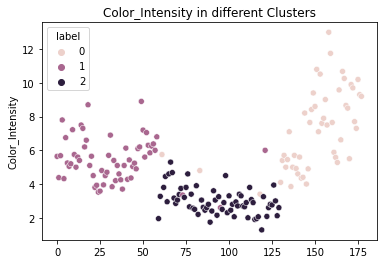

In [14]:
sns.scatterplot(x=df1.index, y=df1['Color_Intensity'],hue=df1['label'])
plt.title('Color_Intensity in different Clusters')
plt.show()

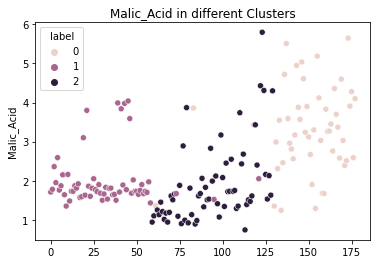

In [15]:
sns.scatterplot(x=df1.index, y=df1['Malic_Acid'],hue=df1['label'])
plt.title('Malic_Acid in different Clusters')
plt.show()

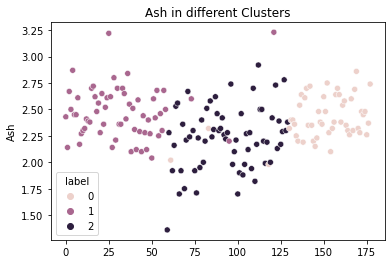

In [17]:
sns.scatterplot(x=df1.index, y=df1['Ash'],hue=df1['label'])
plt.title('Ash in different Clusters')
plt.show()

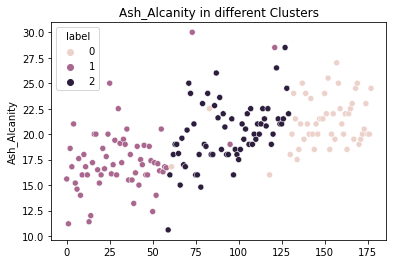

In [18]:
sns.scatterplot(x=df1.index, y=df1['Ash_Alcanity'],hue=df1['label'])
plt.title('Ash_Alcanity in different Clusters')
plt.show()

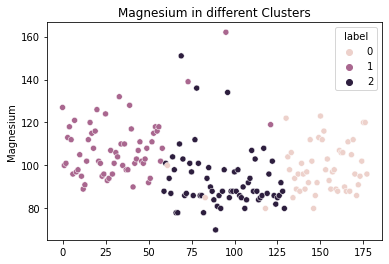

In [19]:
sns.scatterplot(x=df1.index, y=df1['Magnesium'],hue=df1['label'])
plt.title('Magnesium in different Clusters')
plt.show()

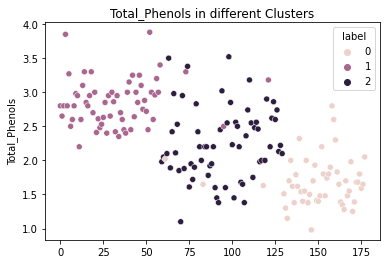

In [20]:
sns.scatterplot(x=df1.index, y=df1['Total_Phenols'],hue=df1['label'])
plt.title('Total_Phenols in different Clusters')
plt.show()

In [21]:
df2=df1[df1['label']==1]
df2[['Alcohol']]

,Alcohol
0,14.23
1,13.20
2,13.16
3,14.37
4,13.24
5,14.20
6,14.39
7,14.06
8,14.83
9,13.86
